In [22]:
from ultralytics import YOLO
import numpy as np

In [25]:
id_joints_dict = {0: 'nose',
        1: 'left_eye',
        2: 'right_eye',
        3: 'left_ear',
        4: 'right_ear',
        5: 'left_shoulder',
        6: 'right_shoulder',
        7: 'left_elbow',
        8: 'right_elbow',
        9: 'left_wrist',
        10: 'right_wrist',
        11: 'left_hip',
        12: 'right_hip',
        13: 'left_knee',
        14: 'right_knee',
        15: 'left_ankle',
        16: 'right_ankle'}
joints_id_dict = {v: k for k, v in id_joints_dict.items()}

In [17]:
model = YOLO('yolov8n-pose.pt')

def get_keypoints_from_keypoints(model, video_path):

    keypoints = []
    results = model(video_path, save=True, show_conf=False, show_boxes=False)
    for frame in results:
        keypoints.append(frame.keypoints.xy)

    return keypoints

In [18]:
keypoints = get_keypoints_from_keypoints(model, '../../data/pose/squat.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 254.3ms
video 1/1 (frame 2/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 269.2ms
video 1/1 (frame 3/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 p

In [32]:
def calculate_angle(a, b, c):

    """
    Calculates the angle between three joints.

    Args:
        a (tuple): coordinates of the first joint
        b (tuple): coordinates of the second joint
        c (tuple): coordinates of the third joint

    Returns:
        angle (float): angle between the three joints
    """
    
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def compute_left_knee_angle(pose):

    """
    Computes the knee angle.

    Args:
        pose (dict): pose dictionary

    Returns:
        knee_angle (float): knee angle
    """

    left_hip = pose[0][joints_id_dict['left_hip']]
    left_knee = pose[0][joints_id_dict['left_knee']]
    left_ankle = pose[0][joints_id_dict['left_ankle']]

    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)

    return knee_angle

def compute_right_knee_angle(pose):

    """
    Computes the knee angle.

    Args:
        pose (dict): pose dictionary

    Returns:
        knee_angle (float): knee angle
    """

    right_hip = pose[0][joints_id_dict['right_hip']]
    right_knee = pose[0][joints_id_dict['right_knee']]
    right_ankle = pose[0][joints_id_dict['right_ankle']]

    knee_angle = calculate_angle(right_hip, right_knee, right_ankle)

    return knee_angle

def moving_average(data, window_size):

    """
    Computes the moving average of a list.

    Args:
        data (list): list of values
        window_size (int): size of the window

    Returns:
        avg (list): list of moving average values
    """

    avg = []
    for i in range(len(data) - window_size + 1):
        avg.append(sum(data[i:i + window_size]) / window_size)

    return avg

In [33]:
angles = []

for i in range(len(keypoints)):
    angles.append(compute_left_knee_angle(keypoints[i]))

angles = moving_average(angles, 10)

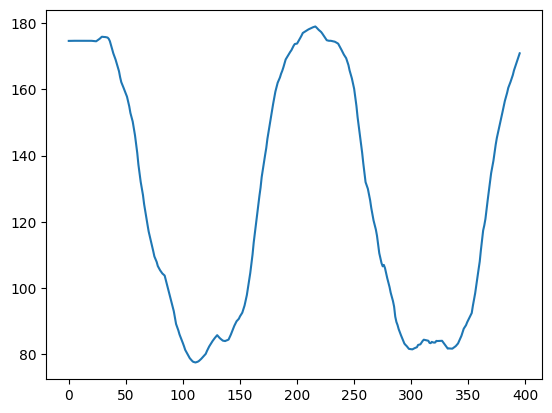

In [34]:
import matplotlib.pyplot as plt

plt.plot(angles)